In [303]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
     

In [304]:
df=pd.read_csv("DataMidSem2024_2.csv")

In [305]:
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [306]:
df.shape

(400, 4)

In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    int64  
 1   gre     400 non-null    int64  
 2   gpa     400 non-null    float64
 3   rank    400 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


In [308]:
df.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [309]:
df.isnull().sum()

admit    0
gre      0
gpa      0
rank     0
dtype: int64

In [310]:
df.duplicated().sum()

5

In [311]:
df.drop_duplicates()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
...,...,...,...,...
394,1,460,3.99,3
395,0,620,4.00,2
396,0,560,3.04,3
397,0,460,2.63,2


In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    int64  
 1   gre     400 non-null    int64  
 2   gpa     400 non-null    float64
 3   rank    400 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


In [313]:
# here admit is the outcome and we are counting no of 0 and 1 in admit
df['admit'].value_counts()

admit
0    273
1    127
Name: count, dtype: int64

In [314]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE()
# x,y = smote.fit_resample(x,y)

In [315]:
# y.value_counts()

In [316]:
# Unique values
for i in df.columns:
  print(i,len(df[i].unique()))

admit 2
gre 26
gpa 132
rank 4


In [317]:
df.corr()

,admit,gre,gpa,rank
admit,1.000000,0.184434,0.178212,-0.242513
gre,0.184434,1.000000,0.384266,-0.123447
gpa,0.178212,0.384266,1.000000,-0.057461
rank,-0.242513,-0.123447,-0.057461,1.000000


<Axes: >

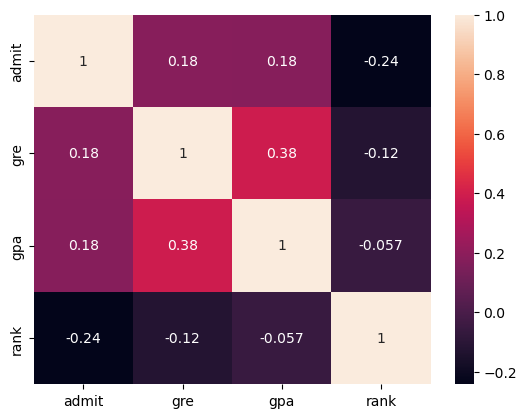

In [318]:
sns.heatmap(df.corr(),annot=True)

In [319]:
X=df.drop('admit',axis=1)
Y=df['admit']

In [320]:
X

,gre,gpa,rank
0,380,3.61,3
1,660,3.67,3
2,800,4.00,1
3,640,3.19,4
4,520,2.93,4
...,...,...,...
395,620,4.00,2
396,560,3.04,3
397,460,2.63,2
398,700,3.65,2


In [321]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Name: admit, Length: 400, dtype: int64

In [322]:
df['admit'].value_counts()

admit
0    273
1    127
Name: count, dtype: int64

Can't train the dataset with this model as most of the dataset has no admission. Model will more frequently predict no admission.

Oversampling.
SMOTE

In [324]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X,Y = smote.fit_resample(X,Y)

In [325]:
 Y.value_counts()

admit
0    273
1    273
Name: count, dtype: int64

In [326]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.7,random_state=42)

In [327]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [328]:
lr=LogisticRegression()

lr.fit(x_train,y_train)

y_pred=lr.predict(x_test)

In [329]:
y_pred = lr.predict(x_test)
y_pred

array([0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [330]:
#Actual value and the predicted value
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
316,1,0
77,1,1
360,1,1
90,0,1
495,1,1
...,...,...
395,0,1
426,1,1
195,0,1
453,1,1


In [331]:
# Accuracy
accuracy_score(y_test, y_pred)

0.6280487804878049

In [332]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.51      0.57        80
           1       0.61      0.74      0.67        84

    accuracy                           0.63       164
   macro avg       0.63      0.63      0.62       164
weighted avg       0.63      0.63      0.62       164



Text(50.722222222222214, 0.5, 'True')

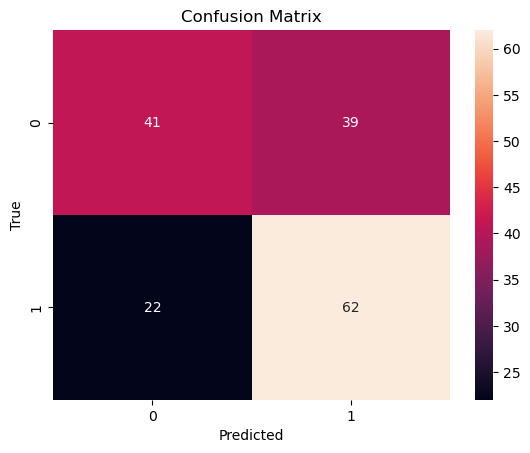

In [333]:
# Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

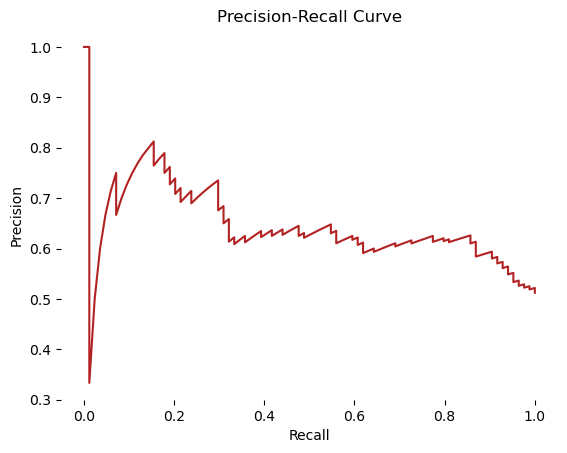

In [334]:
# Plot Precision-Recall Curve
y_pred_proba = lr.predict_proba(x_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

plt.plot(recall, precision, label='Logistic Regression', color = 'firebrick')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.box(False)
plt.show()

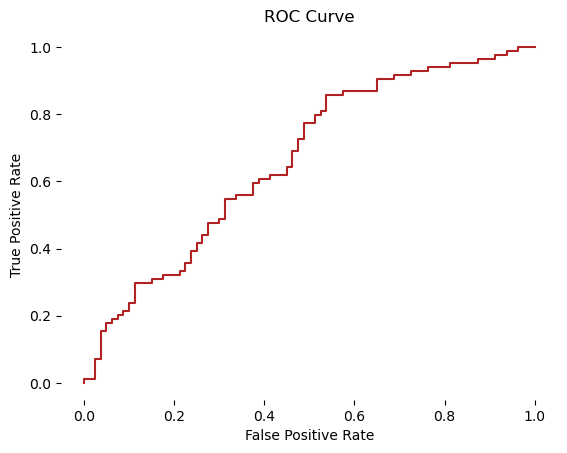

In [335]:
# Plot AUC/ROC curve
y_pred_proba = lr.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)

plt.plot(fpr, tpr, label='Logistic Regression', color = 'firebrick')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.box(False)
plt.show()

In [336]:
# Predict
P_new=np.array([[800,4,1]])
pred=lr.predict(sc.transform(P_new))
print(pred)

[1]


C:\Users\tssin\Amaconda_3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
